## Question 1

In [2]:
#imported libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

In [2]:
# part b
# some pseudocode for Euler Cromer
# the initial positions are updated as follows
# x_i+1 = x_i + v_x,i+1 * delta t
# y_i+1 = y_i + v_y,i+1 * delta t
# from here, we can see we need the current velocity in order to find the current position of our planet. From eqs (6), we
# can see the change in velocity is
# dv/dt = - (G*M_S * x)/r^3
# from here, approximate the velocity as delta v = (v_i+1 - v_i)/ delta t
# solving for v_i+1 gives us
# v_i+1 = v_i - (G*M_S*x_i * delta t)/r^3
# which we can note the coefficient of delta t is the acceleration at the previous index, and r = sqrt(x_i^2 + y_i^2)
# we can then use the acceleration given to us
# dv_i/dt_i  = -(G*M_S * x_i)/r^3
# and use this to update our system

# now with the formulas needed, we can see there is a "stack" forming based on dependence. position is dependent on velocity,
# velocity has acceleration, and acceleration is the previous position in the x and y component (stemming from r). so we know
# we will have some sort of loop/iteration with the independent values being updated before the dependent, starting out from
# some initial conditions.

# introduce some constants for ease in coding/visibility
# have some sort of empty arrays to collect the information of the updated values in the for loop
# for n in (some time frame):
# update r
# update position in x and y
# update velocity in x and y
# update acceleration in x and y
# end loop
# plot the arrays of position and velocity

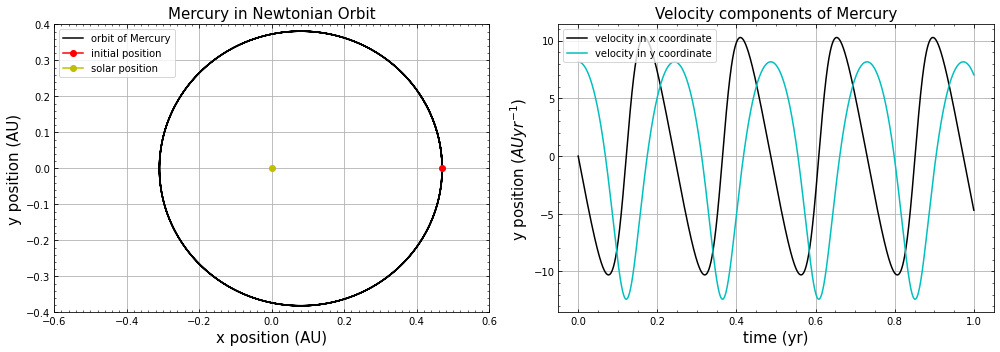

The difference between the initial and final angular momentum is 4.103851681277689e-09 M_S*AU^2*yr^-1


In [3]:
# part c
# now coding the above pseudocode given some initial values similar to Mercury
# initial values
M_S = 1 # 2.0e30 kg, but this G is in solar mass so we have this be 1
M_M = 1.642e-7 # in M_S, 3.285e23 kg, mass of Mercury
G = 39.5 # AU^3 M_S^−1 yr^−2, gravitational constant

x0 = 0.47 # AU
y0 = 0.0 # AU
vx0 = 0.0 # AU/yr
vy0 = 8.17 # AU/yr

# time step
dt = 0.0001
t = np.arange(0,1,dt)

# setting up empty arrays to collect values for position, velocity and acceleration with initial conditions
x_n = np.zeros(len(t))
x_n[0] = x0
y_n = np.zeros(len(t))
y_n[0] = y0

v_xn = np.zeros(len(t))
v_xn[0] = vx0
v_yn = np.zeros(len(t))
v_yn[0] = vy0

a_xn = np.zeros(len(t))
a_yn = np.zeros(len(t))

# zeros angular momentum array to check for conservation
L = np.zeros(len(t))

for n in range(1,len(t)):
    # update the radial distance from the sun
    r = np.sqrt(x_n[n-1]**2 + y_n[n-1]**2)
    # update the acceleration
    a_xn[n] = -(G*M_S* x_n[n-1])/r**3
    a_yn[n] = -(G*M_S* y_n[n-1])/r**3
    # update the velocity
    v_xn[n] = v_xn[n-1] + a_xn[n] * dt
    v_yn[n] = v_yn[n-1] + a_yn[n] * dt
    # update the position 
    x_n[n] = x_n[n-1] + v_xn[n] * dt
    y_n[n] = y_n[n-1] + v_yn[n] * dt
    #compute angular momentum, note this is in M_S*AU^2*yr^-1
    v = np.sqrt(v_xn[n-1]**2 + v_yn[n-1]**2)
    L[n] = M_M*v*r

# plotting elliptical orbit
tdir = 'in'
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
text = 15

fig, (ax0,ax1) = plt.subplots(ncols=2,nrows=1,figsize=(14,5))
# orbit plot
ax0.plot(x_n,y_n,label='orbit of Mercury',color='k')
ax0.plot(x_n[0],y_n[0],label='initial position',color='r',marker='o')
ax0.plot(0,0,label='solar position',color='y',marker='o')
ax0.set_title('Mercury in Newtonian Orbit',fontsize=text)
ax0.set_xlabel('x position (AU)',fontsize=text)
ax0.set_ylabel('y position (AU)',fontsize=text)
#past this point its fancy plotting mechanics
ax0.set_xlim(-0.6,0.6)
ax0.set_ylim(-0.4,0.4)
ax0.xaxis.set_minor_locator(MultipleLocator(0.02))
ax0.yaxis.set_minor_locator(MultipleLocator(0.02))
ax0.yaxis.set_ticks_position('both') 
ax0.xaxis.set_ticks_position('both')
ax0.legend(loc='upper left')
ax0.grid()
# x and y velocity plot
ax1.plot(t,v_xn,label='velocity in x coordinate',color='k')
ax1.plot(t,v_yn,label='velocity in y coordinate',color='c')
ax1.set_title('Velocity components of Mercury',fontsize=text)
ax1.set_xlabel('time (yr)',fontsize=text)
ax1.set_ylabel(r'y position ($AU yr^{-1}$)',fontsize=text)
#past this point its fancy plotting mechanics
ax1.xaxis.set_minor_locator(MultipleLocator(0.05))
ax1.yaxis.set_minor_locator(MultipleLocator(1))
ax1.yaxis.set_ticks_position('both') 
ax1.xaxis.set_ticks_position('both')
ax1.legend(loc='upper left')
ax1.grid()

plt.tight_layout()
plt.savefig('Newtonian_Orbit.png')

plt.show()

#to confirm conservation of angular momentum, we can check the difference between the initial and final angular momentum to see
# if it is close to 0
dL = L[-1] - L[1]
print('The difference between the initial and final angular momentum is',dL,'M_S*AU^2*yr^-1')

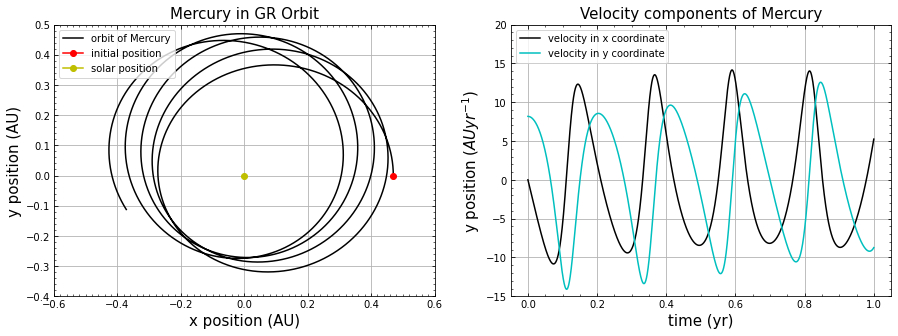

In [4]:
# part d
# altering the above code for the gr gravitational force law, for Mercury again
alpha = 0.01 # AU^2

for n in range(1,len(t)):
    # update the radial distance from the sun
    r = np.sqrt(x_n[n-1]**2 + y_n[n-1]**2)
    # update the acceleration
    a_xn[n] = -(G*M_S* x_n[n-1]*(1+alpha/r**2))/r**3
    a_yn[n] = -(G*M_S* y_n[n-1]*(1+alpha/r**2))/r**3
    # update the velocity
    v_xn[n] = v_xn[n-1] + a_xn[n] * dt
    v_yn[n] = v_yn[n-1] + a_yn[n] * dt
    # update the position 
    x_n[n] = x_n[n-1] + v_xn[n] * dt
    y_n[n] = y_n[n-1] + v_yn[n] * dt
    #compute angular momentum, note this is in M_S*AU^2*yr^-1
    v = np.sqrt(v_xn[n-1]**2 + v_yn[n-1]**2)
    L[n] = M_M*v*r
    
# plotting elliptical GR orbit
tdir = 'in'
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir

fig, (ax0,ax1) = plt.subplots(ncols=2,nrows=1,figsize=(15,5))
ax0.plot(x_n,y_n,label='orbit of Mercury',color='k')
ax0.plot(x_n[0],y_n[0],label='initial position',color='r',marker='o')
ax0.plot(0,0,label='solar position',color='y',marker='o')
ax0.set_title('Mercury in GR Orbit',fontsize=text)
ax0.set_xlabel('x position (AU)',fontsize=text)
ax0.set_ylabel('y position (AU)',fontsize=text)
# past this point its fancy plotting mechanics
ax0.set_xlim(-0.6,0.6)
ax0.set_ylim(-0.4,0.5)
ax0.xaxis.set_minor_locator(MultipleLocator(0.02))
ax0.yaxis.set_minor_locator(MultipleLocator(0.02))
ax0.yaxis.set_ticks_position('both') 
ax0.xaxis.set_ticks_position('both')
ax0.legend(loc='upper left')
ax0.grid()
#velocity plots for x and y
ax1.plot(t,v_xn,label='velocity in x coordinate',color='k')
ax1.plot(t,v_yn,label='velocity in y coordinate',color='c')
ax1.set_title('Velocity components of Mercury',fontsize=text)
ax1.set_xlabel('time (yr)',fontsize=text)
ax1.set_ylabel(r'y position ($AU yr^{-1}$)',fontsize=text)
#past this point its fancy plotting mechanics
#ax1.set_xlim(-0.6,0.6)
ax1.set_ylim(-15,20)
ax1.xaxis.set_minor_locator(MultipleLocator(0.05))
ax1.yaxis.set_minor_locator(MultipleLocator(1))
ax1.yaxis.set_ticks_position('both') 
ax1.xaxis.set_ticks_position('both')
ax1.legend(loc='upper left')
ax1.grid()

plt.savefig('GR_Orbit.png')

plt.show()